In [2]:
import pandas as pd
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier


In [3]:
cd ..

C:\Users\sanch\code\feliperattes\soccer_pred


In [4]:
cd "Kaggle Data"

C:\Users\sanch\code\feliperattes\soccer_pred\Kaggle Data


In [5]:
matches_df = pd.read_csv("BRA.csv")

In [6]:
matches_df.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [7]:
matches_df.isnull().sum()

Country    0
League     0
Season     0
Date       0
Time       0
Home       0
Away       0
HG         1
AG         1
Res        1
PH         1
PD         1
PA         1
MaxH       0
MaxD       0
MaxA       0
AvgH       0
AvgD       0
AvgA       0
dtype: int64

In [8]:
matches_df = matches_df.copy()

In [9]:
matches_df = matches_df.drop(["League", "Country", "Date", "Time"], axis="columns")

In [10]:
matches_df = matches_df.dropna()
matches_df

,Season,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,2012,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,2012,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,2012,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,2012,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,2012,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,2020,Gremio,Ceara,4.0,2.0,H,1.75,3.62,5.26,1.78,3.80,5.51,1.73,3.51,4.94
3239,2020,Flamengo RJ,Atletico GO,1.0,1.0,D,1.48,4.52,7.00,1.51,4.75,7.37,1.45,4.49,6.35
3240,2020,Palmeiras,Fluminense,2.0,0.0,H,2.01,3.35,4.16,2.10,3.50,4.33,2.00,3.24,3.90
3241,2020,Coritiba,Bahia,1.0,2.0,A,2.89,3.08,2.77,2.97,3.10,2.80,2.83,2.98,2.64


In [11]:
matches_df["Sum_Goals"] = matches_df["HG"] + matches_df["AG"]
matches_df

,Season,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,Sum_Goals
0,2012,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90,2.0
1,2012,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58,2.0
2,2012,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64,3.0
3,2012,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84,6.0
4,2012,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,2020,Gremio,Ceara,4.0,2.0,H,1.75,3.62,5.26,1.78,3.80,5.51,1.73,3.51,4.94,6.0
3239,2020,Flamengo RJ,Atletico GO,1.0,1.0,D,1.48,4.52,7.00,1.51,4.75,7.37,1.45,4.49,6.35,2.0
3240,2020,Palmeiras,Fluminense,2.0,0.0,H,2.01,3.35,4.16,2.10,3.50,4.33,2.00,3.24,3.90,2.0
3241,2020,Coritiba,Bahia,1.0,2.0,A,2.89,3.08,2.77,2.97,3.10,2.80,2.83,2.98,2.64,3.0


In [12]:
#d[(d['x']>2) & (d['y']>7)]

In [13]:
#df.loc[df['fare-bin'] == 'nan', 'fare-bin'] = '[45+]'

In [14]:
#matches_df.loc[matches_df["Home"] == "Palmeiras", "Palmerias Goals"] = matches_df[(matches_df["Home"] == "Palmeiras")]["HG"].cumsum()

In [15]:
teams = matches_df["Home"].unique()

In [16]:
teams

array(['Palmeiras', 'Sport Recife', 'Figueirense', 'Botafogo RJ',
       'Corinthians', 'Internacional', 'Ponte Preta', 'Bahia', 'Cruzeiro',
       'Vasco', 'Atletico GO', 'Flamengo RJ', 'Portuguesa', 'Nautico',
       'Atletico-MG', 'Coritiba', 'Santos', 'Sao Paulo', 'Fluminense',
       'Gremio', 'Vitoria', 'Criciuma', 'Atletico-PR', 'Goias',
       'Chapecoense-SC', 'Avai', 'Joinville', 'Santa Cruz', 'America MG',
       'Parana', 'Ceara', 'Athletico-PR', 'CSA', 'Fortaleza',
       'Bragantino'], dtype=object)

In [16]:
for team in teams:
    #comulative
    matches_df.loc[matches_df["Home"] == team, "Goals Sum HOME"] = matches_df[(matches_df["Home"] == team)]["HG"].cumsum()
    matches_df.loc[matches_df["Away"] == team, "Goals Sum AWAY"] = matches_df[(matches_df["Away"] == team)]["AG"].cumsum()
    #total goals
    matches_df.loc[matches_df["Home"] == team, "Total Home Goals"] = matches_df[(matches_df["Home"] == team)]["HG"].sum()
    matches_df.loc[matches_df["Away"] == team, "Total Away Goals"] = matches_df[(matches_df["Away"] == team)]["AG"].sum()

In [17]:
matches_df

,Season,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,Sum_Goals,Goals Sum HOME,Goals Sum AWAY,Total Home Goals,Total Away Goals
0,2012,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90,2.0,1.0,1.0,243.0,32.0
1,2012,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58,2.0,1.0,1.0,169.0,183.0
2,2012,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64,3.0,2.0,1.0,86.0,21.0
3,2012,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84,6.0,4.0,2.0,198.0,169.0
4,2012,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89,1.0,0.0,1.0,237.0,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,2020,Gremio,Ceara,4.0,2.0,H,1.75,3.62,5.26,1.78,3.80,5.51,1.73,3.51,4.94,6.0,251.0,40.0,251.0,40.0
3239,2020,Flamengo RJ,Atletico GO,1.0,1.0,D,1.48,4.52,7.00,1.51,4.75,7.37,1.45,4.49,6.35,2.0,270.0,42.0,270.0,42.0
3240,2020,Palmeiras,Fluminense,2.0,0.0,H,2.01,3.35,4.16,2.10,3.50,4.33,2.00,3.24,3.90,2.0,243.0,165.0,243.0,165.0
3241,2020,Coritiba,Bahia,1.0,2.0,A,2.89,3.08,2.77,2.97,3.10,2.80,2.83,2.98,2.64,3.0,157.0,114.0,157.0,114.0


In [18]:
count = pd.DataFrame(matches_df.groupby("Home")["Season"].unique())
count

,Season
Home,
America MG,"[2016, 2018]"
Athletico-PR,"[2019, 2020]"
Atletico GO,"[2012, 2017, 2020]"
Atletico-MG,"[2012, 2013, 2014, 2015, 2016, 2017, 2018, 201..."
Atletico-PR,"[2013, 2014, 2015, 2016, 2017, 2018]"
Avai,"[2015, 2017, 2019]"
Bahia,"[2012, 2013, 2014, 2017, 2018, 2019, 2020]"
Botafogo RJ,"[2012, 2013, 2014, 2016, 2017, 2018, 2019, 2020]"
Bragantino,[2020]


In [19]:
count['No_seasons_Home_Team'] = count.Season.apply(lambda x: len(x))

In [20]:
count

,Season,No_seasons_Home_Team
Home,,
America MG,"[2016, 2018]",2
Athletico-PR,"[2019, 2020]",2
Atletico GO,"[2012, 2017, 2020]",3
Atletico-MG,"[2012, 2013, 2014, 2015, 2016, 2017, 2018, 201...",9
Atletico-PR,"[2013, 2014, 2015, 2016, 2017, 2018]",6
Avai,"[2015, 2017, 2019]",3
Bahia,"[2012, 2013, 2014, 2017, 2018, 2019, 2020]",7
Botafogo RJ,"[2012, 2013, 2014, 2016, 2017, 2018, 2019, 2020]",8
Bragantino,[2020],1


In [21]:
matches_df = matches_df.merge(count, on="Home", how="left")

In [22]:
matches_df.head()

,Season_x,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,...,AvgH,AvgD,AvgA,Sum_Goals,Goals Sum HOME,Goals Sum AWAY,Total Home Goals,Total Away Goals,Season_y,No_seasons_Home_Team
0,2012,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,...,1.69,3.50,4.90,2.0,1.0,1.0,243.0,32.0,"[2012, 2014, 2015, 2016, 2017, 2018, 2019, 2020]",8
1,2012,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,...,2.59,3.23,2.58,2.0,1.0,1.0,169.0,183.0,"[2012, 2014, 2015, 2016, 2017, 2018, 2020]",7
2,2012,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,...,1.59,3.67,5.64,3.0,2.0,1.0,86.0,21.0,"[2012, 2014, 2015, 2016]",4
3,2012,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,...,2.35,3.26,2.84,6.0,4.0,2.0,198.0,169.0,"[2012, 2013, 2014, 2016, 2017, 2018, 2019, 2020]",8
4,2012,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,...,1.89,3.33,3.89,1.0,0.0,1.0,237.0,165.0,"[2012, 2013, 2014, 2015, 2016, 2017, 2018, 201...",9


In [23]:
away = pd.DataFrame(matches_df.groupby("Away")["Season_x"].unique())
away

,Season_x
Away,
America MG,"[2016, 2018]"
Athletico-PR,"[2019, 2020]"
Atletico GO,"[2012, 2017, 2020]"
Atletico-MG,"[2012, 2013, 2014, 2015, 2016, 2017, 2018, 201..."
Atletico-PR,"[2013, 2014, 2015, 2016, 2017, 2018]"
Avai,"[2015, 2017, 2019]"
Bahia,"[2012, 2013, 2014, 2017, 2018, 2019, 2020]"
Botafogo RJ,"[2012, 2013, 2014, 2016, 2017, 2018, 2019, 2020]"
Bragantino,[2020]


In [112]:
count.Season.apply(lambda x: len(x))

Home
America MG        2
Athletico-PR      2
Atletico GO       3
Atletico-MG       9
Atletico-PR       6
Avai              3
Bahia             7
Botafogo RJ       8
Bragantino        1
CSA               1
Ceara             3
Chapecoense-SC    6
Corinthians       9
Coritiba          7
Criciuma          2
Cruzeiro          8
Figueirense       4
Flamengo RJ       9
Fluminense        9
Fortaleza         2
Goias             5
Gremio            9
Internacional     8
Joinville         1
Nautico           2
Palmeiras         8
Parana            1
Ponte Preta       5
Portuguesa        2
Santa Cruz        1
Santos            9
Sao Paulo         9
Sport Recife      7
Vasco             7
Vitoria           5
Name: Season, dtype: int64

In [24]:
away['No_seasons_Away_Team'] = count.Season.apply(lambda x: len(x))

In [25]:
away

,Season_x,No_seasons_Away_Team
Away,,
America MG,"[2016, 2018]",2
Athletico-PR,"[2019, 2020]",2
Atletico GO,"[2012, 2017, 2020]",3
Atletico-MG,"[2012, 2013, 2014, 2015, 2016, 2017, 2018, 201...",9
Atletico-PR,"[2013, 2014, 2015, 2016, 2017, 2018]",6
Avai,"[2015, 2017, 2019]",3
Bahia,"[2012, 2013, 2014, 2017, 2018, 2019, 2020]",7
Botafogo RJ,"[2012, 2013, 2014, 2016, 2017, 2018, 2019, 2020]",8
Bragantino,[2020],1


In [26]:
matches_df = matches_df.merge(away, on="Away", how="left")

In [27]:
matches_df

,Season_x_x,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,...,AvgA,Sum_Goals,Goals Sum HOME,Goals Sum AWAY,Total Home Goals,Total Away Goals,Season_y,No_seasons_Home_Team,Season_x_y,No_seasons_Away_Team
0,2012,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,...,4.90,2.0,1.0,1.0,243.0,32.0,"[2012, 2014, 2015, 2016, 2017, 2018, 2019, 2020]",8,"[2012, 2013]",2
1,2012,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,...,2.58,2.0,1.0,1.0,169.0,183.0,"[2012, 2014, 2015, 2016, 2017, 2018, 2020]",7,"[2012, 2013, 2014, 2015, 2016, 2017, 2018, 201...",9
2,2012,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,...,5.64,3.0,2.0,1.0,86.0,21.0,"[2012, 2014, 2015, 2016]",4,"[2012, 2013]",2
3,2012,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,...,2.84,6.0,4.0,2.0,198.0,169.0,"[2012, 2013, 2014, 2016, 2017, 2018, 2019, 2020]",8,"[2012, 2013, 2014, 2015, 2016, 2017, 2018, 201...",9
4,2012,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,...,3.89,1.0,0.0,1.0,237.0,165.0,"[2012, 2013, 2014, 2015, 2016, 2017, 2018, 201...",9,"[2012, 2013, 2014, 2015, 2016, 2017, 2018, 201...",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,2020,Gremio,Ceara,4.0,2.0,H,1.75,3.62,5.26,1.78,...,4.94,6.0,251.0,40.0,251.0,40.0,"[2012, 2013, 2014, 2015, 2016, 2017, 2018, 201...",9,"[2018, 2019, 2020]",3
3238,2020,Flamengo RJ,Atletico GO,1.0,1.0,D,1.48,4.52,7.00,1.51,...,6.35,2.0,270.0,42.0,270.0,42.0,"[2012, 2013, 2014, 2015, 2016, 2017, 2018, 201...",9,"[2012, 2017, 2020]",3
3239,2020,Palmeiras,Fluminense,2.0,0.0,H,2.01,3.35,4.16,2.10,...,3.90,2.0,243.0,165.0,243.0,165.0,"[2012, 2014, 2015, 2016, 2017, 2018, 2019, 2020]",8,"[2012, 2013, 2014, 2015, 2016, 2017, 2018, 201...",9
3240,2020,Coritiba,Bahia,1.0,2.0,A,2.89,3.08,2.77,2.97,...,2.64,3.0,157.0,114.0,157.0,114.0,"[2012, 2013, 2014, 2015, 2016, 2017, 2020]",7,"[2012, 2013, 2014, 2017, 2018, 2019, 2020]",7


In [28]:
#matches_df.loc[matches_df["Home"] == "Palmeiras", "Palmerias Goals"] = matches_df[(matches_df["Home"] == "Palmeiras")]["HG"].sum()

In [29]:
matches_df = matches_df.drop(["Season_y", "Season_x_y"], axis="columns") 
matches_df

,Season_x_x,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,...,AvgH,AvgD,AvgA,Sum_Goals,Goals Sum HOME,Goals Sum AWAY,Total Home Goals,Total Away Goals,No_seasons_Home_Team,No_seasons_Away_Team
0,2012,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,...,1.69,3.50,4.90,2.0,1.0,1.0,243.0,32.0,8,2
1,2012,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,...,2.59,3.23,2.58,2.0,1.0,1.0,169.0,183.0,7,9
2,2012,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,...,1.59,3.67,5.64,3.0,2.0,1.0,86.0,21.0,4,2
3,2012,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,...,2.35,3.26,2.84,6.0,4.0,2.0,198.0,169.0,8,9
4,2012,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,...,1.89,3.33,3.89,1.0,0.0,1.0,237.0,165.0,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,2020,Gremio,Ceara,4.0,2.0,H,1.75,3.62,5.26,1.78,...,1.73,3.51,4.94,6.0,251.0,40.0,251.0,40.0,9,3
3238,2020,Flamengo RJ,Atletico GO,1.0,1.0,D,1.48,4.52,7.00,1.51,...,1.45,4.49,6.35,2.0,270.0,42.0,270.0,42.0,9,3
3239,2020,Palmeiras,Fluminense,2.0,0.0,H,2.01,3.35,4.16,2.10,...,2.00,3.24,3.90,2.0,243.0,165.0,243.0,165.0,8,9
3240,2020,Coritiba,Bahia,1.0,2.0,A,2.89,3.08,2.77,2.97,...,2.83,2.98,2.64,3.0,157.0,114.0,157.0,114.0,7,7


In [30]:
matches_df = matches_df.rename(columns={"Season_x_x": "Season", "No_seasons_Home_Team": "HomeTeam_Seasons", "No_seasons_Away_Team": "AwayTeam_Seasons"})

In [31]:
matches_df

,Season,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,...,AvgH,AvgD,AvgA,Sum_Goals,Goals Sum HOME,Goals Sum AWAY,Total Home Goals,Total Away Goals,HomeTeam_Seasons,AwayTeam_Seasons
0,2012,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,...,1.69,3.50,4.90,2.0,1.0,1.0,243.0,32.0,8,2
1,2012,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,...,2.59,3.23,2.58,2.0,1.0,1.0,169.0,183.0,7,9
2,2012,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,...,1.59,3.67,5.64,3.0,2.0,1.0,86.0,21.0,4,2
3,2012,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,...,2.35,3.26,2.84,6.0,4.0,2.0,198.0,169.0,8,9
4,2012,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,...,1.89,3.33,3.89,1.0,0.0,1.0,237.0,165.0,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,2020,Gremio,Ceara,4.0,2.0,H,1.75,3.62,5.26,1.78,...,1.73,3.51,4.94,6.0,251.0,40.0,251.0,40.0,9,3
3238,2020,Flamengo RJ,Atletico GO,1.0,1.0,D,1.48,4.52,7.00,1.51,...,1.45,4.49,6.35,2.0,270.0,42.0,270.0,42.0,9,3
3239,2020,Palmeiras,Fluminense,2.0,0.0,H,2.01,3.35,4.16,2.10,...,2.00,3.24,3.90,2.0,243.0,165.0,243.0,165.0,8,9
3240,2020,Coritiba,Bahia,1.0,2.0,A,2.89,3.08,2.77,2.97,...,2.83,2.98,2.64,3.0,157.0,114.0,157.0,114.0,7,7


In [32]:
matches_df["HomeTeam_GoalsperSeason"] = matches_df["Total Home Goals"] / matches_df["HomeTeam_Seasons"]
matches_df["AwayTeam_GoalsperSeason"] = matches_df["Total Away Goals"] / matches_df["AwayTeam_Seasons"]


In [33]:
matches_df

,Season,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,...,AvgA,Sum_Goals,Goals Sum HOME,Goals Sum AWAY,Total Home Goals,Total Away Goals,HomeTeam_Seasons,AwayTeam_Seasons,HomeTeam_GoalsperSeason,AwayTeam_GoalsperSeason
0,2012,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,...,4.90,2.0,1.0,1.0,243.0,32.0,8,2,30.375000,16.000000
1,2012,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,...,2.58,2.0,1.0,1.0,169.0,183.0,7,9,24.142857,20.333333
2,2012,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,...,5.64,3.0,2.0,1.0,86.0,21.0,4,2,21.500000,10.500000
3,2012,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,...,2.84,6.0,4.0,2.0,198.0,169.0,8,9,24.750000,18.777778
4,2012,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,...,3.89,1.0,0.0,1.0,237.0,165.0,9,9,26.333333,18.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,2020,Gremio,Ceara,4.0,2.0,H,1.75,3.62,5.26,1.78,...,4.94,6.0,251.0,40.0,251.0,40.0,9,3,27.888889,13.333333
3238,2020,Flamengo RJ,Atletico GO,1.0,1.0,D,1.48,4.52,7.00,1.51,...,6.35,2.0,270.0,42.0,270.0,42.0,9,3,30.000000,14.000000
3239,2020,Palmeiras,Fluminense,2.0,0.0,H,2.01,3.35,4.16,2.10,...,3.90,2.0,243.0,165.0,243.0,165.0,8,9,30.375000,18.333333
3240,2020,Coritiba,Bahia,1.0,2.0,A,2.89,3.08,2.77,2.97,...,2.64,3.0,157.0,114.0,157.0,114.0,7,7,22.428571,16.285714


In [34]:
matches_df["Goals Sum HOME"].max()

297.0

In [35]:
matches_df["Goals Sum AWAY"].max()

183.0

In [36]:
matches_df[(matches_df["Home"] == "Palmeiras")]["HG"].cumsum()


0         1.0
31        1.0
45        2.0
68        5.0
87        6.0
        ...  
3155    237.0
3176    237.0
3185    238.0
3219    241.0
3239    243.0
Name: HG, Length: 143, dtype: float64

In [37]:
#matches over .5 Goals
matches_df.loc[matches_df["Sum_Goals"] > 0.5, "Over 0.5"] = 1
matches_df["Over 0.5"] = matches_df["Over 0.5"].fillna(0)

#matches over 1.5 Goals
matches_df.loc[matches_df["Sum_Goals"] > 1.5, "Over 1.5"] = 1
matches_df["Over 1.5"] = matches_df["Over 1.5"].fillna(0)

#matches over 2.5 Goals
matches_df.loc[matches_df["Sum_Goals"] > 2.5, "Over 2.5"] = 1
matches_df["Over 2.5"] = matches_df["Over 2.5"].fillna(0)

#matches over 3.5 Goals
matches_df.loc[matches_df["Sum_Goals"] > 3.5, "Over 3.5"] = 1
matches_df["Over 3.5"] = matches_df["Over 3.5"].fillna(0)

#matches over 4.5 Goals
matches_df.loc[matches_df["Sum_Goals"] > 4.5, "Over 4.5"] = 1
matches_df["Over 4.5"] = matches_df["Over 4.5"].fillna(0)

#matches over 5.5 Goals
matches_df.loc[matches_df["Sum_Goals"] > 5.5, "Over 5.5"] = 1
matches_df["Over 5.5"] = matches_df["Over 5.5"].fillna(0)

In [38]:
matches_df.sort_index()

,Season,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,...,HomeTeam_Seasons,AwayTeam_Seasons,HomeTeam_GoalsperSeason,AwayTeam_GoalsperSeason,Over 0.5,Over 1.5,Over 2.5,Over 3.5,Over 4.5,Over 5.5
0,2012,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,...,8,2,30.375000,16.000000,1.0,1.0,0.0,0.0,0.0,0.0
1,2012,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,...,7,9,24.142857,20.333333,1.0,1.0,0.0,0.0,0.0,0.0
2,2012,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,...,4,2,21.500000,10.500000,1.0,1.0,1.0,0.0,0.0,0.0
3,2012,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,...,8,9,24.750000,18.777778,1.0,1.0,1.0,1.0,1.0,1.0
4,2012,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,...,9,9,26.333333,18.333333,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,2020,Gremio,Ceara,4.0,2.0,H,1.75,3.62,5.26,1.78,...,9,3,27.888889,13.333333,1.0,1.0,1.0,1.0,1.0,1.0
3238,2020,Flamengo RJ,Atletico GO,1.0,1.0,D,1.48,4.52,7.00,1.51,...,9,3,30.000000,14.000000,1.0,1.0,0.0,0.0,0.0,0.0
3239,2020,Palmeiras,Fluminense,2.0,0.0,H,2.01,3.35,4.16,2.10,...,8,9,30.375000,18.333333,1.0,1.0,0.0,0.0,0.0,0.0
3240,2020,Coritiba,Bahia,1.0,2.0,A,2.89,3.08,2.77,2.97,...,7,7,22.428571,16.285714,1.0,1.0,1.0,0.0,0.0,0.0


In [39]:
matches_df.head()

,Season,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,...,HomeTeam_Seasons,AwayTeam_Seasons,HomeTeam_GoalsperSeason,AwayTeam_GoalsperSeason,Over 0.5,Over 1.5,Over 2.5,Over 3.5,Over 4.5,Over 5.5
0,2012,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,...,8,2,30.375000,16.000000,1.0,1.0,0.0,0.0,0.0,0.0
1,2012,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,...,7,9,24.142857,20.333333,1.0,1.0,0.0,0.0,0.0,0.0
2,2012,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,...,4,2,21.500000,10.500000,1.0,1.0,1.0,0.0,0.0,0.0
3,2012,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,...,8,9,24.750000,18.777778,1.0,1.0,1.0,1.0,1.0,1.0
4,2012,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,...,9,9,26.333333,18.333333,1.0,0.0,0.0,0.0,0.0,0.0


In [40]:
matches_df["Sum_Goals"].mean()

2.367057371992597

In [41]:
matches_df["Over 5.5"].sum()

113.0

In [42]:
matches_encoded_df = pd.get_dummies(matches_df)

In [43]:
matches_encoded_df

,Season,HG,AG,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,...,Away_Portuguesa,Away_Santa Cruz,Away_Santos,Away_Sao Paulo,Away_Sport Recife,Away_Vasco,Away_Vitoria,Res_A,Res_D,Res_H
0,2012,1.0,1.0,1.75,3.86,5.25,1.76,3.87,5.31,1.69,...,1,0,0,0,0,0,0,0,1,0
1,2012,1.0,1.0,2.83,3.39,2.68,2.83,3.42,2.70,2.59,...,0,0,0,0,0,0,0,0,1,0
2,2012,2.0,1.0,1.60,4.04,6.72,1.67,4.05,7.22,1.59,...,0,0,0,0,0,0,0,0,0,1
3,2012,4.0,2.0,2.49,3.35,3.15,2.49,3.39,3.15,2.35,...,0,0,0,1,0,0,0,0,0,1
4,2012,0.0,1.0,1.96,3.53,4.41,1.96,3.53,4.41,1.89,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,2020,4.0,2.0,1.75,3.62,5.26,1.78,3.80,5.51,1.73,...,0,0,0,0,0,0,0,0,0,1
3238,2020,1.0,1.0,1.48,4.52,7.00,1.51,4.75,7.37,1.45,...,0,0,0,0,0,0,0,0,1,0
3239,2020,2.0,0.0,2.01,3.35,4.16,2.10,3.50,4.33,2.00,...,0,0,0,0,0,0,0,0,0,1
3240,2020,1.0,2.0,2.89,3.08,2.77,2.97,3.10,2.80,2.83,...,0,0,0,0,0,0,0,1,0,0


In [44]:
matches_encoded_df.columns

Index(['Season', 'HG', 'AG', 'PH', 'PD', 'PA', 'MaxH', 'MaxD', 'MaxA', 'AvgH',
       'AvgD', 'AvgA', 'Sum_Goals', 'Goals Sum HOME', 'Goals Sum AWAY',
       'Total Home Goals', 'Total Away Goals', 'HomeTeam_Seasons',
       'AwayTeam_Seasons', 'HomeTeam_GoalsperSeason',
       'AwayTeam_GoalsperSeason', 'Over 0.5', 'Over 1.5', 'Over 2.5',
       'Over 3.5', 'Over 4.5', 'Over 5.5', 'Home_America MG',
       'Home_Athletico-PR', 'Home_Atletico GO', 'Home_Atletico-MG',
       'Home_Atletico-PR', 'Home_Avai', 'Home_Bahia', 'Home_Botafogo RJ',
       'Home_Bragantino', 'Home_CSA', 'Home_Ceara', 'Home_Chapecoense-SC',
       'Home_Corinthians', 'Home_Coritiba', 'Home_Criciuma', 'Home_Cruzeiro',
       'Home_Figueirense', 'Home_Flamengo RJ', 'Home_Fluminense',
       'Home_Fortaleza', 'Home_Goias', 'Home_Gremio', 'Home_Internacional',
       'Home_Joinville', 'Home_Nautico', 'Home_Palmeiras', 'Home_Parana',
       'Home_Ponte Preta', 'Home_Portuguesa', 'Home_Santa Cruz', 'Home_Santos',
     

In [45]:
matches_encoded_df = matches_encoded_df.drop(["Season", "HG", 'PH', 'PD', 'PA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AG', 'AvgD', 'AvgA', 'Res_A', 'Res_D', 'Res_H'], axis="columns")

In [46]:
matches_encoded_df = matches_encoded_df.drop(["Goals Sum HOME", "Goals Sum AWAY", "Total Home Goals", "Total Away Goals"], axis="columns")

In [47]:
matches_encoded_df

,Sum_Goals,HomeTeam_Seasons,AwayTeam_Seasons,HomeTeam_GoalsperSeason,AwayTeam_GoalsperSeason,Over 0.5,Over 1.5,Over 2.5,Over 3.5,Over 4.5,...,Away_Palmeiras,Away_Parana,Away_Ponte Preta,Away_Portuguesa,Away_Santa Cruz,Away_Santos,Away_Sao Paulo,Away_Sport Recife,Away_Vasco,Away_Vitoria
0,2.0,8,2,30.375000,16.000000,1.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,2.0,7,9,24.142857,20.333333,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,4,2,21.500000,10.500000,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,6.0,8,9,24.750000,18.777778,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
4,1.0,9,9,26.333333,18.333333,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,6.0,9,3,27.888889,13.333333,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3238,2.0,9,3,30.000000,14.000000,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3239,2.0,8,9,30.375000,18.333333,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3240,3.0,7,7,22.428571,16.285714,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
matches_encoded_df

,Sum_Goals,HomeTeam_Seasons,AwayTeam_Seasons,HomeTeam_GoalsperSeason,AwayTeam_GoalsperSeason,Over 0.5,Over 1.5,Over 2.5,Over 3.5,Over 4.5,...,Away_Palmeiras,Away_Parana,Away_Ponte Preta,Away_Portuguesa,Away_Santa Cruz,Away_Santos,Away_Sao Paulo,Away_Sport Recife,Away_Vasco,Away_Vitoria
0,2.0,8,2,30.375000,16.000000,1.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,2.0,7,9,24.142857,20.333333,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,4,2,21.500000,10.500000,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,6.0,8,9,24.750000,18.777778,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
4,1.0,9,9,26.333333,18.333333,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,6.0,9,3,27.888889,13.333333,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3238,2.0,9,3,30.000000,14.000000,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3239,2.0,8,9,30.375000,18.333333,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3240,3.0,7,7,22.428571,16.285714,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
matches_encoded_df.columns

Index(['Sum_Goals', 'HomeTeam_Seasons', 'AwayTeam_Seasons',
       'HomeTeam_GoalsperSeason', 'AwayTeam_GoalsperSeason', 'Over 0.5',
       'Over 1.5', 'Over 2.5', 'Over 3.5', 'Over 4.5', 'Over 5.5',
       'Home_America MG', 'Home_Athletico-PR', 'Home_Atletico GO',
       'Home_Atletico-MG', 'Home_Atletico-PR', 'Home_Avai', 'Home_Bahia',
       'Home_Botafogo RJ', 'Home_Bragantino', 'Home_CSA', 'Home_Ceara',
       'Home_Chapecoense-SC', 'Home_Corinthians', 'Home_Coritiba',
       'Home_Criciuma', 'Home_Cruzeiro', 'Home_Figueirense',
       'Home_Flamengo RJ', 'Home_Fluminense', 'Home_Fortaleza', 'Home_Goias',
       'Home_Gremio', 'Home_Internacional', 'Home_Joinville', 'Home_Nautico',
       'Home_Palmeiras', 'Home_Parana', 'Home_Ponte Preta', 'Home_Portuguesa',
       'Home_Santa Cruz', 'Home_Santos', 'Home_Sao Paulo', 'Home_Sport Recife',
       'Home_Vasco', 'Home_Vitoria', 'Away_America MG', 'Away_Athletico-PR',
       'Away_Atletico GO', 'Away_Atletico-MG', 'Away_Atletico-PR', 

In [50]:

X = matches_encoded_df.drop(["Sum_Goals", 'Over 0.5', 'Over 1.5', 'Over 2.5', 'Over 3.5', 'Over 4.5',
       'Over 5.5'], axis="columns")
y1 = matches_encoded_df[['Over 0.5']]
y2 = matches_encoded_df[['Over 1.5']]
y3 = matches_encoded_df[['Over 2.5']]
y4 = matches_encoded_df[['Over 3.5']]
y5 = matches_encoded_df[['Over 4.5']]
y6 = matches_encoded_df[['Over 5.5']]



X_train,X_test,y_train_1,y_test_1 = train_test_split(X,y1,test_size=.2,random_state=7)
X_train,X_test,y_train_2,y_test_2 = train_test_split(X,y2,test_size=.2,random_state=7)
X_train_,X_test,y_train_3,y_test_3 = train_test_split(X,y3,test_size=.2,random_state=7)
X_train,X_test,y_train_4,y_test_4 = train_test_split(X,y4,test_size=.2,random_state=7)
X_train_,X_test,y_train_5,y_test_5 = train_test_split(X,y5,test_size=.2,random_state=7)
X_train_,X_test,y_train_6,y_test_6 = train_test_split(X,y6,test_size=.2,random_state=7)



In [51]:
X.columns.values

array(['HomeTeam_Seasons', 'AwayTeam_Seasons', 'HomeTeam_GoalsperSeason',
       'AwayTeam_GoalsperSeason', 'Home_America MG', 'Home_Athletico-PR',
       'Home_Atletico GO', 'Home_Atletico-MG', 'Home_Atletico-PR',
       'Home_Avai', 'Home_Bahia', 'Home_Botafogo RJ', 'Home_Bragantino',
       'Home_CSA', 'Home_Ceara', 'Home_Chapecoense-SC',
       'Home_Corinthians', 'Home_Coritiba', 'Home_Criciuma',
       'Home_Cruzeiro', 'Home_Figueirense', 'Home_Flamengo RJ',
       'Home_Fluminense', 'Home_Fortaleza', 'Home_Goias', 'Home_Gremio',
       'Home_Internacional', 'Home_Joinville', 'Home_Nautico',
       'Home_Palmeiras', 'Home_Parana', 'Home_Ponte Preta',
       'Home_Portuguesa', 'Home_Santa Cruz', 'Home_Santos',
       'Home_Sao Paulo', 'Home_Sport Recife', 'Home_Vasco',
       'Home_Vitoria', 'Away_America MG', 'Away_Athletico-PR',
       'Away_Atletico GO', 'Away_Atletico-MG', 'Away_Atletico-PR',
       'Away_Avai', 'Away_Bahia', 'Away_Botafogo RJ', 'Away_Bragantino',
       'Away

In [52]:
y6["Over 5.5"].sum()

113.0

In [53]:
model1 = LogisticRegression()
model1.fit(X_train, y_train_1)

C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [54]:
model2 = LogisticRegression()
model2.fit(X_train, y_train_2)

C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [55]:
model3 = LogisticRegression()
model3.fit(X_train, y_train_3)

C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [56]:
model4 = LogisticRegression()
model4.fit(X_train, y_train_4)

C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [57]:
model5 = LogisticRegression()
model5.fit(X_train, y_train_5)

C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [58]:
model6 = LogisticRegression()
model6.fit(X_train, y_train_6)

C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [59]:
model1.score(X_test, y_test_1)


0.9029275808936826

In [60]:
model2.score(X_test,  y_test_2)

0.6533127889060092

In [61]:
model3.score(X_test,  y_test_3)

0.5778120184899846

In [62]:
model4.score(X_test,  y_test_4)

0.8043143297380585

In [63]:
model5.score(X_test,  y_test_5)

0.9183359013867488

In [64]:
model6.score(X_test,  y_test_6)

0.9738058551617874

In [65]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [66]:
X[2500:2501]

,HomeTeam_Seasons,AwayTeam_Seasons,HomeTeam_GoalsperSeason,AwayTeam_GoalsperSeason,Home_America MG,Home_Athletico-PR,Home_Atletico GO,Home_Atletico-MG,Home_Atletico-PR,Home_Avai,...,Away_Palmeiras,Away_Parana,Away_Ponte Preta,Away_Portuguesa,Away_Santa Cruz,Away_Santos,Away_Sao Paulo,Away_Sport Recife,Away_Vasco,Away_Vitoria
2500,8,6,30.375,15.833333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
match1 = 8,6,30.375,15.833333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [68]:
match2 = 1, 1,12, 6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [69]:
matches_df[2500:2501]

,Season,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,...,HomeTeam_Seasons,AwayTeam_Seasons,HomeTeam_GoalsperSeason,AwayTeam_GoalsperSeason,Over 0.5,Over 1.5,Over 2.5,Over 3.5,Over 4.5,Over 5.5
2500,2018,Palmeiras,Atletico-PR,2.0,0.0,H,1.55,3.8,8.05,1.58,...,8,6,30.375,15.833333,1.0,1.0,0.0,0.0,0.0,0.0


In [70]:
# Predicts on Match Palmeiras (HomeTeam) vs Atletico PR (AwayTeam) (match 2500 in data base)
print(f"Over 0.5 = {model1.predict_proba([match1])}")
print(f"Over 1.5 = {model2.predict_proba([match1])}")
print(f"Over 2.5 = {model3.predict_proba([match1])}")
print(f"Over 3.5 = {model4.predict_proba([match1])}")
print(f"Over 4.5 = {model5.predict_proba([match1])}")
print(f"Over 5.5 = {model6.predict_proba([match1])}")

Over 0.5 = [[0.04232036 0.95767964]]
Over 1.5 = [[0.31146647 0.68853353]]
Over 2.5 = [[0.58159878 0.41840122]]
Over 3.5 = [[0.75403356 0.24596644]]
Over 4.5 = [[0.86865139 0.13134861]]
Over 5.5 = [[0.9394895 0.0605105]]


In [71]:
matches_df[2700:2701]

,Season,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,...,HomeTeam_Seasons,AwayTeam_Seasons,HomeTeam_GoalsperSeason,AwayTeam_GoalsperSeason,Over 0.5,Over 1.5,Over 2.5,Over 3.5,Over 4.5,Over 5.5
2700,2019,Atletico-MG,Flamengo RJ,2.0,1.0,H,2.88,3.21,2.68,2.98,...,9,9,33.0,20.333333,1.0,1.0,1.0,0.0,0.0,0.0


In [72]:
X[2700:2701]

,HomeTeam_Seasons,AwayTeam_Seasons,HomeTeam_GoalsperSeason,AwayTeam_GoalsperSeason,Home_America MG,Home_Athletico-PR,Home_Atletico GO,Home_Atletico-MG,Home_Atletico-PR,Home_Avai,...,Away_Palmeiras,Away_Parana,Away_Ponte Preta,Away_Portuguesa,Away_Santa Cruz,Away_Santos,Away_Sao Paulo,Away_Sport Recife,Away_Vasco,Away_Vitoria
2700,9,9,33.0,20.333333,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
match2700 = 9,9,33.0,20.333333,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [74]:
# Predicts on Match Atletico MG (HomeTeam) vs Flamengo RJ (AwayTeam) (match 2700 in data base)
print(f"Over 0.5 = {model1.predict_proba([match2700])}")
print(f"Over 1.5 = {model2.predict_proba([match2700])}")
print(f"Over 2.5 = {model3.predict_proba([match2700])}")
print(f"Over 3.5 = {model4.predict_proba([match2700])}")
print(f"Over 4.5 = {model5.predict_proba([match2700])}")
print(f"Over 5.5 = {model6.predict_proba([match2700])}")

Over 0.5 = [[0.04251822 0.95748178]]
Over 1.5 = [[0.22974379 0.77025621]]
Over 2.5 = [[0.38830038 0.61169962]]
Over 3.5 = [[0.64158092 0.35841908]]
Over 4.5 = [[0.85078037 0.14921963]]
Over 5.5 = [[0.96070823 0.03929177]]


In [75]:

print(f"Over 0.5 = {model1.predict_proba([match2])}")
print(f"Over 1.5 = {model2.predict_proba([match2])}")
print(f"Over 2.5 = {model3.predict_proba([match2])}")
print(f"Over 3.5 = {model4.predict_proba([match2])}")
print(f"Over 4.5 = {model5.predict_proba([match2])}")
print(f"Over 5.5 = {model6.predict_proba([match2])}")

Over 0.5 = [[0.17409311 0.82590689]]
Over 1.5 = [[0.27509659 0.72490341]]
Over 2.5 = [[0.50165038 0.49834962]]
Over 3.5 = [[0.74872528 0.25127472]]
Over 4.5 = [[0.89996827 0.10003173]]
Over 5.5 = [[0.95039775 0.04960225]]


In [76]:
matches_df[2500:2501]

,Season,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,...,HomeTeam_Seasons,AwayTeam_Seasons,HomeTeam_GoalsperSeason,AwayTeam_GoalsperSeason,Over 0.5,Over 1.5,Over 2.5,Over 3.5,Over 4.5,Over 5.5
2500,2018,Palmeiras,Atletico-PR,2.0,0.0,H,1.55,3.8,8.05,1.58,...,8,6,30.375,15.833333,1.0,1.0,0.0,0.0,0.0,0.0


In [77]:
X[1:2]

,HomeTeam_Seasons,AwayTeam_Seasons,HomeTeam_GoalsperSeason,AwayTeam_GoalsperSeason,Home_America MG,Home_Athletico-PR,Home_Atletico GO,Home_Atletico-MG,Home_Atletico-PR,Home_Avai,...,Away_Palmeiras,Away_Parana,Away_Ponte Preta,Away_Portuguesa,Away_Santa Cruz,Away_Santos,Away_Sao Paulo,Away_Sport Recife,Away_Vasco,Away_Vitoria
1,7,9,24.142857,20.333333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
matches_df

,Season,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,...,HomeTeam_Seasons,AwayTeam_Seasons,HomeTeam_GoalsperSeason,AwayTeam_GoalsperSeason,Over 0.5,Over 1.5,Over 2.5,Over 3.5,Over 4.5,Over 5.5
0,2012,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,...,8,2,30.375000,16.000000,1.0,1.0,0.0,0.0,0.0,0.0
1,2012,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,...,7,9,24.142857,20.333333,1.0,1.0,0.0,0.0,0.0,0.0
2,2012,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,...,4,2,21.500000,10.500000,1.0,1.0,1.0,0.0,0.0,0.0
3,2012,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,...,8,9,24.750000,18.777778,1.0,1.0,1.0,1.0,1.0,1.0
4,2012,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,...,9,9,26.333333,18.333333,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,2020,Gremio,Ceara,4.0,2.0,H,1.75,3.62,5.26,1.78,...,9,3,27.888889,13.333333,1.0,1.0,1.0,1.0,1.0,1.0
3238,2020,Flamengo RJ,Atletico GO,1.0,1.0,D,1.48,4.52,7.00,1.51,...,9,3,30.000000,14.000000,1.0,1.0,0.0,0.0,0.0,0.0
3239,2020,Palmeiras,Fluminense,2.0,0.0,H,2.01,3.35,4.16,2.10,...,8,9,30.375000,18.333333,1.0,1.0,0.0,0.0,0.0,0.0
3240,2020,Coritiba,Bahia,1.0,2.0,A,2.89,3.08,2.77,2.97,...,7,7,22.428571,16.285714,1.0,1.0,1.0,0.0,0.0,0.0


In [79]:
#predicted match for the 24 of nov between Ceara and Sao Pablo
match25nov = [ 3, 9, 13.3, 18.77, 0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]

In [80]:
print(f"Over 0.5 = {model1.predict_proba([match25nov])}")
print(f"Over 1.5 = {model2.predict_proba([match25nov])}")
print(f"Over 2.5 = {model3.predict_proba([match25nov])}")
print(f"Over 3.5 = {model4.predict_proba([match25nov])}")
print(f"Over 4.5 = {model5.predict_proba([match25nov])}")
print(f"Over 5.5 = {model6.predict_proba([match25nov])}")

Over 0.5 = [[0.25876608 0.74123392]]
Over 1.5 = [[0.47797153 0.52202847]]
Over 2.5 = [[0.69823913 0.30176087]]
Over 3.5 = [[0.94297237 0.05702763]]
Over 4.5 = [[0.96258287 0.03741713]]
Over 5.5 = [[0.98556198 0.01443802]]


We predict it will be lower than 2.5 goals

## Random Forest


In [93]:
forest = RandomForestClassifier(n_estimators=100)

cv_results_1 = cross_validate(forest, X, y1, scoring="accuracy", cv=10)

print(cv_results_1['test_score'].mean())

C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\mod

0.8911244064577397


In [94]:
forest = RandomForestClassifier(n_estimators=100)

cv_results_2 = cross_validate(forest, X, y2, scoring="accuracy", cv=10)

print(cv_results_2['test_score'].mean())

C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\mod

0.601490978157645


In [96]:
forest = RandomForestClassifier(n_estimators=100)

cv_results_3 = cross_validate(forest, X, y3, scoring="accuracy", cv=10)

print(cv_results_3['test_score'].mean())

C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\mod

0.5135546058879392


In [97]:
forest = RandomForestClassifier(n_estimators=100)

cv_results_4 = cross_validate(forest, X, y4, scoring="accuracy", cv=10)

print(cv_results_4['test_score'].mean())

C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\mod

0.7412003798670466


In [98]:
forest = RandomForestClassifier(n_estimators=100)

cv_results_5 = cross_validate(forest, X, y5, scoring="accuracy", cv=10)

print(cv_results_5['test_score'].mean())

C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\mod

0.8932763532763532


In [99]:
forest = RandomForestClassifier(n_estimators=100)

cv_results_6 = cross_validate(forest, X, y6, scoring="accuracy", cv=10)

print(cv_results_6['test_score'].mean())

C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sanch\anaconda3\envs\lewagon_conda\lib\site-packages\sklearn\mod

0.9614453941120609


In [105]:
cv_results = cross_validate(DecisionTreeClassifier(), X_train,
                            y_train_1, cv=5, scoring=['accuracy'])
print(cv_results['test_accuracy'].mean())

0.8569271170427241


In [106]:
cv_results = cross_validate(DecisionTreeClassifier(), X_train,
                            y_train_2, cv=5, scoring=['accuracy'])
print(cv_results['test_accuracy'].mean())

0.5453210435869396


In [107]:
cv_results = cross_validate(DecisionTreeClassifier(), X_train,
                            y_train_3, cv=5, scoring=['accuracy'])
print(cv_results['test_accuracy'].mean())

0.5190974624500636


In [109]:
cv_results = cross_validate(DecisionTreeClassifier(), X_train,
                            y_train_4, cv=5, scoring=['accuracy'])
print(cv_results['test_accuracy'].mean())

0.7269511460262905


In [110]:
cv_results = cross_validate(DecisionTreeClassifier(), X_train,
                            y_train_5, cv=5, scoring=['accuracy'])
print(cv_results['test_accuracy'].mean())

0.8839162035693828


In [111]:
cv_results = cross_validate(DecisionTreeClassifier(), X_train,
                            y_train_6, cv=5, scoring=['accuracy'])
print(cv_results['test_accuracy'].mean())

0.9571927005453016


<AxesSubplot:>

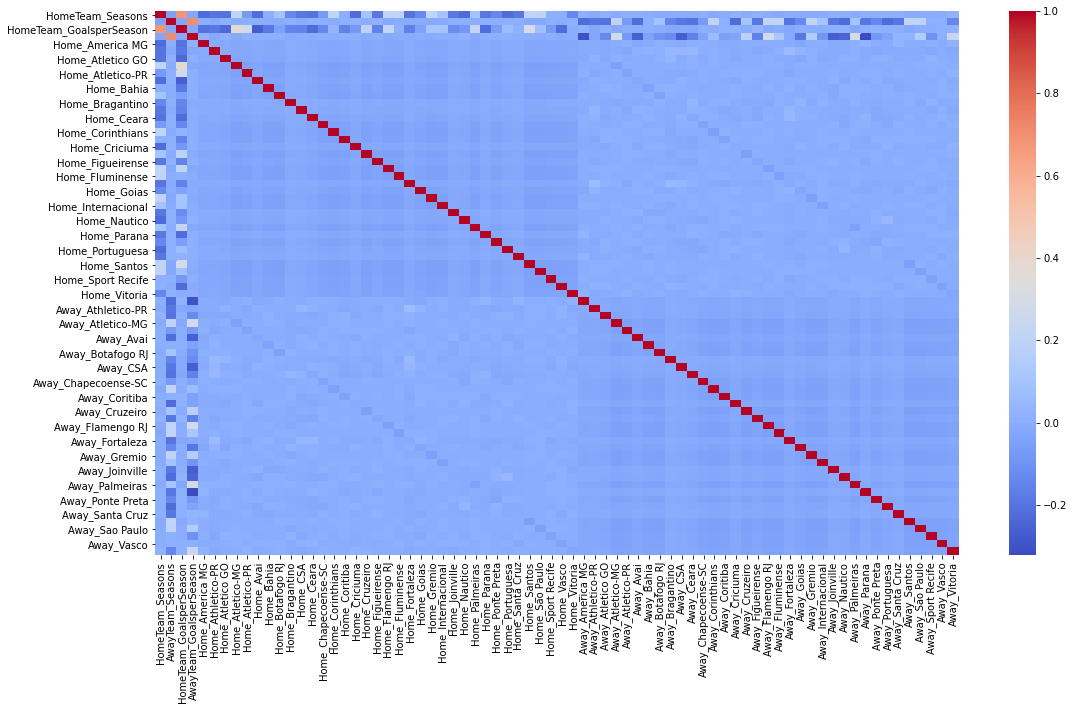

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,10))
sns.heatmap(pd.DataFrame(X.corr()), cmap='coolwarm')